In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('../../data/dataset.csv')
Inputs = df['Inputs']
Directions = df['Directions'].values
Energy = df['Energy'].values
df.head()

,Inputs,Directions,Energy
0,HHHHP,SRRRL,1
1,HHHHP,SRRRF,1
2,HHHHP,SRLLR,1
3,HHHHP,SRLLF,1
4,HHHHP,SLRRL,1


In [3]:
dic = {}
for i,input in enumerate(Inputs):
    try:
        dic[input].append([Directions[i],Energy[i]])
    except:
        dic[input] = [[Directions[i],Energy[i]]]

data = {}

for key in dic.keys():
    max_energy = 0
    for _,energy in dic[key]:
        if max_energy < energy: 
            max_energy = energy
    data[key] = {'energy':max_energy,'directions':[]}

values = []

for key in dic.keys():
    for dir,energy in dic[key]:
        if energy == data[key]['energy']:
            data[key]['directions'].append(dir)
            values.append([key,dir])

In [4]:
vals = pd.DataFrame(values,columns=['Inputs','Directions'])
vals.head()

,Inputs,Directions
0,HHHHP,SRRRL
1,HHHHP,SRRRF
2,HHHHP,SRLLR
3,HHHHP,SRLLF
4,HHHHP,SLRRL


In [21]:
import sys
sys.path.append('../../')
sys.path.append('../')

In [6]:
from libs.functions import make_experiment

[[1.  0.5 0.  0.8 0. ]
 [0.5 1.  0.5 0.  0. ]
 [0.  0.5 1.  0.5 0. ]
 [0.8 0.  0.5 1.  0.5]
 [0.  0.  0.  0.5 1. ]]


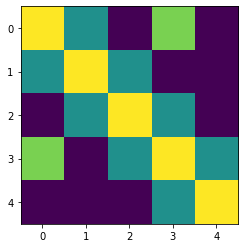

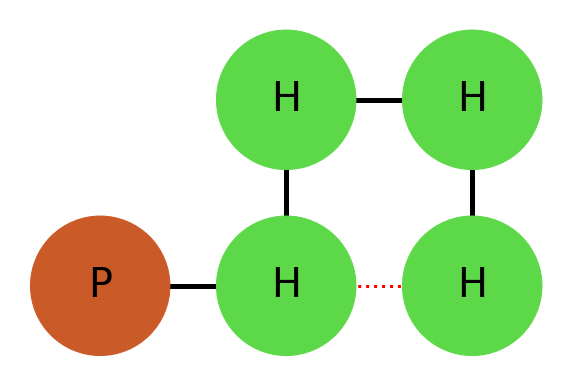

In [7]:
exp = make_experiment(*vals.iloc[10])
exp.count_energy()
print(exp.make_correlation_matrix())
plt.imshow(exp.correlation)
plt.show()
exp.plot_Experiment()

In [9]:
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

In [13]:
cell = tfd.Categorical(probs=[1/2]*2)
model1 = tfd.JointDistributionSequential([cell]*3)
decision_tree = tfd.JointDistributionSequential([cell]*2)

In [20]:
modelStates = tfd.JointDistributionSequential([model1,decision_tree])
modelStates.prob([[0,1,1],[1,1]])

<tf.Tensor: shape=(), dtype=float32, numpy=0.031249998>